## Importing Dependencies

In [ ]:
%pip install --quiet --upgrade diffusers transformers scipy ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 63.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.1 MB/s eta 0:00:00


In [ ]:
%pip install --quiet --upgrade accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
import torch # for backend
import requests # for internet access
from PIL import Image # regular python library for image processing

from diffusers import StableDiffusionDepth2ImgPipeline # Hugging face pipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
#  Creating a variable instance of the pipeline
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda") #  Assigning to GPU

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/490M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

depth_estimator/config.json:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionDepth2ImgPipeline {
  "_class_name": "StableDiffusionDepth2ImgPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "stabilityai/stable-diffusion-2-depth",
  "depth_estimator": [
    "transformers",
    "DPTForDepthEstimation"
  ],
  "feature_extractor": [
    "transformers",
    "DPTImageProcessor"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Preparing Image Data

In [ ]:
# Accesssing images from the web
import urllib.parse as parse
import os
import requests
# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

In [ ]:
# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# Loading Image

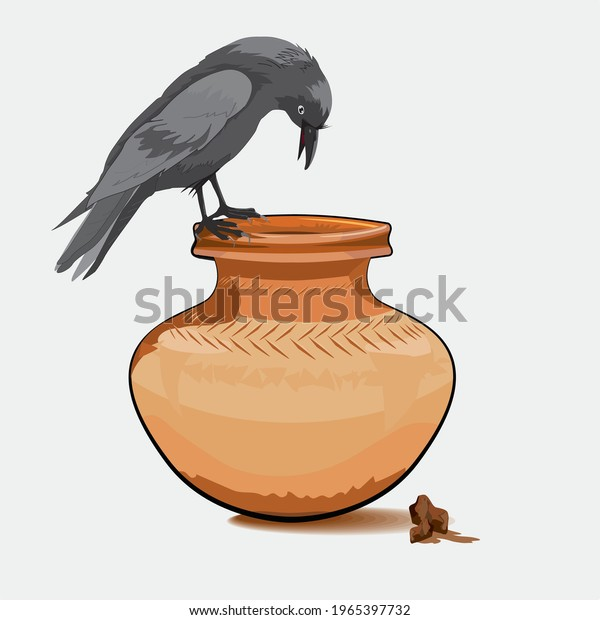

In [ ]:
img = load_image("https://www.shutterstock.com/image-vector/illustration-story-thirsty-crow-storybook-600w-1965397732.jpg")
img

# Creating Text Prompts

  0%|          | 0/35 [00:00<?, ?it/s]

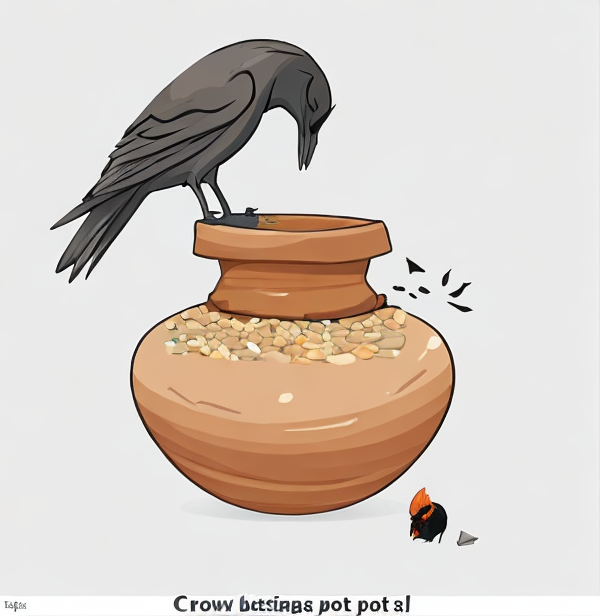

In [ ]:
prompt="crow putting stones in the pot"
pipe(prompt=prompt, image=img, negative_prompt=None, strength=0.7).images[0]

# Creating negative Prompts

In [ ]:
img = load_image("https://img.freepik.com/free-photo/stacked-tomatoes_1353-262.jpg?w=740&t=st=1683821147~exp=1683821747~hmac=708f16371d1e158d76c8ea5e8b9790fb68dc75009750b8328e17c21f16d36468")
img

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=0.7).images[0]

# Adjusting diffusion level

At strength = 0.1

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=0.1).images[0]

At strength = 0.4

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=0.4).images[0]

At strength = 1.0

In [ ]:
prompt = ""
n_prompt = "rot, bad, decayed, wrinkled"
pipe(prompt=prompt, image=img, negative_prompt=n_prompt, strength=1.0).images[0]